In [18]:
import pandas as pd
import numpy as np
import random
from pre_normalize import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# In[2]:


#normal_data
normal_df = pd.read_csv('../data/normal1.csv')
attack_df = pd.read_csv('../data/attack1.csv')

In [19]:
normal_time = normal_df.copy()
attack_time = attack_df.copy()

In [20]:
from datetime import datetime
resampled_time = normal_time['timestamp'].apply(lambda x:datetime.fromtimestamp(x))
resampled_time_series = pd.to_datetime(resampled_time, format='%Y-%m-%d %H:%M:%S')

df = pd.DataFrame(resampled_time_series)
df['packet'] = 1

In [21]:
df = df.set_index('timestamp')

In [22]:
df = df.resample('1S').sum()

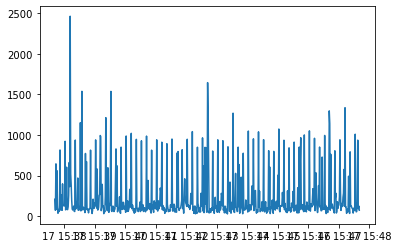

In [23]:
plt.plot(df['packet'])

In [24]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=100, max_samples='auto',contamination=float(0.01), verbose = 2)

In [25]:
model.fit(df.values)

Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


IsolationForest(contamination=0.01, verbose=2)

In [26]:
resampled_time = attack_time['timestamp'].apply(lambda x:datetime.fromtimestamp(x))
resampled_time_series = pd.to_datetime(resampled_time, format='%Y-%m-%d %H:%M:%S')

df_attack = pd.DataFrame(resampled_time_series)
df_attack['packet'] = 1


In [27]:
df_attack = df_attack.set_index('timestamp')
df_attack = df_attack.resample('1S').sum()

In [28]:
pred = model.predict(df_attack.values)

In [29]:
pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [30]:
color_array = []

for x in list(pred):
    if x == -1:
        color_array.append('r')
    else:
        color_array.append('g')

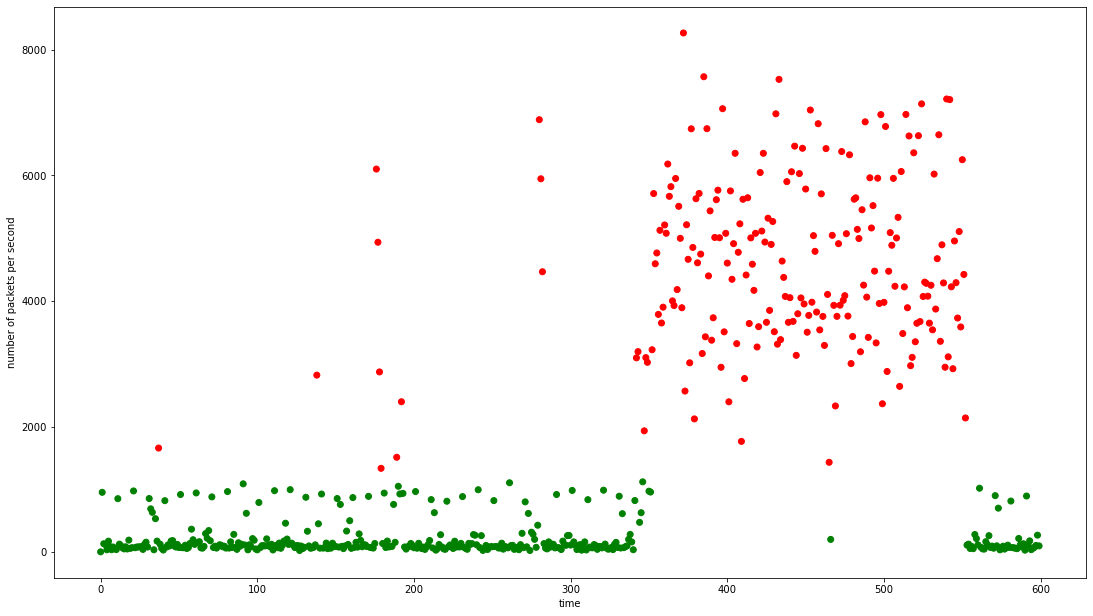

In [37]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.xlabel("time")
plt.ylabel("number of packets per second")
plt.scatter([x for x in range(len(pred))], [x for x in list(df_attack['packet'])],color = color_array)
plt.savefig("isolation_forest.jpg", dpi = 220, bbox_inches='tight')